# Ejemplo: El huevo cocido perfecto

## Geofísica Matemática y Computacional

- Prof. Luis Miguel de la Cruz Salas
- Rev: lun sep 28 20:17:37 CDT 2020

## Fórmula para calcular el tiempo de cocción.
La siguiente fórmula expresa el tiempo $t$, en segundos, que le toma a la yema alcanzar la temperatura $T_y$, en grados Celsius.

$$
t = \dfrac{M^{2/3} c \rho^{1/3}}{K \pi^2 (4\pi/3)^{2/3}} \ln \left[ 0.76 \dfrac{T_o - T_w}{T_y - T_w}\right]
$$

donde las propiedades son:

- $M$ masa; 
- $\rho$ densidad; 
- $c$ capacidad calorífica específica; 
- $K$ conductividad térmica; 
- $T_w$ es la temperatura de ebullición del agua y 
- $T_o$ es la temperatura original del huevo antes de meterlo al agua. 
- $T_y$ es la temperatura final de la yema. 

**Huevo suave**: La clara necesita calentarse lo suficiente para coagular a una temperatura de 63 $^o$C, pero la yema no debe llegar a los 70 $^o$C.

**Huevo duro**: La yema debe calentarse a 70 $^o$C.

### Ejercicio 0.
Hagamos el cálculo para un huevo pequeño. (La masa de un huevo grande es 67 g)

- $M$ = 47 g 
- $\rho$ = 1.038 g / cm$^3$
- $c$ = 3.7 J / g K
- $K$ = 5.4 $\times 10^{-3}$ W / cm K
- $T_w$ = 100 $^o$C
- $T_y$ = 70 $^o$C

Temperatura original del huevo:
- Temperatura ambiente: $T_o$ = 20 $^o$C.
- Temperatura en el refrigerador: $T_o$ = 4 $^o$C.

In [1]:
# Datos iniciales
M = 47 # [g]
rho = 1.038 # [g /cm^3]
c = 3.7 # [J / g K]
K = 5.4e-3 # [W / cm K]

In [2]:
# Numerador
numerador = M**(2/3) * c * rho**(1/3)

In [3]:
print(numerador)

48.790216719661984


Para calcular el denominador necesitamos el valor de $\pi$. La biblioteca matemática `math` contiene, entre otras cosas, constantes que son muy usadas en cálculos. La podemos importar como sigue:

```python 
import math
```

y luego para usar un objeto de la biblioteca `math`, por ejemplo el valor de $\pi$ en la fórmula de cálculo de el área de un círculo, hacemos:

```python 
area = math.pi * radio**2
```

In [4]:
import math

In [5]:
denominador = K * math.pi**2 * (4 * math.pi / 3)**(2/3)

In [6]:
print(denominador)

0.13849026450902358


**Otras maneras de importar una biblioteca son las siguientes**

- Importar la biblioteca y ponerle otro nombre:

```python 
import math as m 

area = m.pi * radio**2
```
- Importar solo un objeto de la biblioteca:

```python 
from math import pi

area = pi * radio**2
```

- Importar solo un objeto de la biblioteca y a éste ponerle otro nombre:

```python 
from math import pi as PI

area = PI * radio**2
```


In [7]:
To = 20
Tw = 100 
Ty = 70 
T = (To - Tw) / (Ty - Tw)

t0 = (numerador /denominador) * math.log(0.76 * T)
print('t0 = ', t0)

t0 =  248.86253747844736


### Ejercicio 1. 
Escribir una función que transforme el resultado a minutos y segundos; luego escribir el resultado en el siguiente formato:

```python
El tiempo de cocción óptimo es: M minutos con S segundos
```
**Versión 1**.

In [19]:
def to_minutos_0(ts):
    """
    Esta función transforma segundos a minutos.
    ts es el valor de los segundos.
    """
    segundos = ts % 60
    minutos = int(ts / 60)
    return (minutos, segundos)

In [ ]:
to_minutos_0(ts)

In [9]:
(m, s) = to_minutos_0(t0)
print('El tiempo de cocción óptimo es: {} minutos con {} segundos'.format(m, s))

El tiempo de cocción óptimo es: 4 minutos con 8.862537478447365 segundos


In [13]:
(m, s) = to_minutos_0(t0)
print('El tiempo de cocción óptimo es: {} minutos con {:2.0f} segundos'.format(m, s))

El tiempo de cocción óptimo es: 4 minutos con  9 segundos


In [14]:
print('El tiempo de cocción óptimo es: {} minutos con {:2.0f} segundos'.format(to_minutos_0(t0)[0],
                                                                               to_minutos_0(t0)[1]))

El tiempo de cocción óptimo es: 4 minutos con  9 segundos


**Versión 2**.

In [15]:
def to_minutos_1(ts):
    return int(ts / 60), ts % 60

In [16]:
(m, s) = to_minutos_1(t0)
print('El tiempo de cocción óptimo es: {} minutos con {:2.0f} segundos'.format(m, s))

El tiempo de cocción óptimo es: 4 minutos con  9 segundos


**Versión 3**. (Lambda function)

In [17]:
to_minutos_2 = lambda ts: (int(ts / 60), ts % 60)

In [18]:
(m, s) = to_minutos_2(t0)
print('El tiempo de cocción óptimo es: {} minutos con {:2.0f} segundos'.format(m, s))

El tiempo de cocción óptimo es: 4 minutos con  9 segundos


### Ejercicio 2.  
Calcular el tiempo de cocción óptimo para cocinar el mismo huevo duro, pero esta vez recién sacado del refrigerador ($T_o = 4^o C$). Luego calcular la diferencia con el resultado anterior.

Primero vamos a escribir una función para evaluar toda la fórmula:

$t = \dfrac{M^{2/3} c \rho^{1/3}}{K \pi^2 (4\pi/3)^{2/3}} \ln \left[ 0.76 \dfrac{T_o - T_w}{T_y - T_w}\right]$

In [46]:
def huevoCocido(M, c, ρ, K, To, Tw = 100, Ty = 70):
    num = M**(2/3) * c * rho**(1/3)
    den = K * math.pi**2 * (4 * math.pi / 3)**(2/3)    
    T = (To - Tw) / (Ty - Tw)
#    return (num /den) * math.log(0.76 * T)
    return (num /den) * np.log(0.76 * T)

In [21]:
ρ = rho
t1 = huevoCocido(M, c, ρ, K, To = 4)

In [22]:
(m, s) = to_minutos_2(t1)
print('El tiempo de cocción óptimo es: {} minutos con {:2.0f} segundos'.format(m, s))

El tiempo de cocción óptimo es: 5 minutos con 13 segundos


In [23]:
(m, s) = to_minutos_2(huevoCocido(M, c, ρ, K, To = 4))
print('El tiempo de cocción óptimo es: {} minutos con {:2.0f} segundos'.format(m, s))

El tiempo de cocción óptimo es: 5 minutos con 13 segundos


Ahora calculamos la diferencia entre t0 y t1:

In [24]:
(m, s) = to_minutos_2(math.fabs(t0 - t1))
print('El tiempo de cocción óptimo es: {} minutos con {:2.0f} segundos'.format(m, s))

El tiempo de cocción óptimo es: 1 minutos con  4 segundos


### Ejercicio 3. (Numpy y Pandas)
Hacer una lista de tiempos para temperaturas del huevo, desde la que se tiene en el refrigerador hasta temperatura ambiente, en pasos de 1$^o$C.

In [25]:
Tl = []
tl = []
for i in range(4,21):
    Tl.append(i)
    t = huevoCocido(M, c, ρ, K, i)
    tl.append(t)
print(Tl)
print(tl)

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[313.09454902221637, 309.4055027800624, 305.67741828677003, 301.9094604759048, 298.100767196758, 294.25044803027765, 290.3575830395756, 286.42122145062837, 282.44038025843554, 278.41404275352505, 274.34115696328047, 270.22063400211084, 266.05134632399165, 261.83212587036, 257.5617621057524, 253.23899993292162, 248.86253747844736]


Vamos a imprimir en un formato más legible usando Numpy y Pandas:

In [26]:
import numpy as np
import pandas as pd

In [27]:
df = pd.DataFrame(Tl, tl)

In [28]:
df

,0
313.094549,4
309.405503,5
305.677418,6
301.909460,7
298.100767,8
294.250448,9
290.357583,10
286.421221,11
282.440380,12
278.414043,13


In [29]:
df = pd.DataFrame(np.asarray([Tl, tl]))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,4.000000,5.000000,6.000000,7.00000,8.000000,9.000000,10.000000,11.000000,12.00000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000,20.000000
1,313.094549,309.405503,305.677418,301.90946,298.100767,294.250448,290.357583,286.421221,282.44038,278.414043,274.341157,270.220634,266.051346,261.832126,257.561762,253.239,248.862537


In [ ]:
df = pd.DataFrame(np.asarray([Tl, tl]).T)
df

In [30]:
df = pd.DataFrame(np.asarray([Tl, tl]).T, columns=['T $^o$ [C]', 't [s]'], index=list(range(1, len(Tl)+1)))
df

,T $^o$ [C],t [s]
1,4.0,313.094549
2,5.0,309.405503
3,6.0,305.677418
4,7.0,301.909460
5,8.0,298.100767
6,9.0,294.250448
7,10.0,290.357583
8,11.0,286.421221
9,12.0,282.440380
10,13.0,278.414043


In [31]:
ml = []
sl = []

for ti in tl:
    (m, s) = to_minutos_2(ti)
    ml.append(m)
    sl.append(s)

df['Min'] = ml
df['Sec'] = sl
df

,T $^o$ [C],t [s],Min,Sec
1,4.0,313.094549,5,13.094549
2,5.0,309.405503,5,9.405503
3,6.0,305.677418,5,5.677418
4,7.0,301.909460,5,1.909460
5,8.0,298.100767,4,58.100767
6,9.0,294.250448,4,54.250448
7,10.0,290.357583,4,50.357583
8,11.0,286.421221,4,46.421221
9,12.0,282.440380,4,42.440380
10,13.0,278.414043,4,38.414043


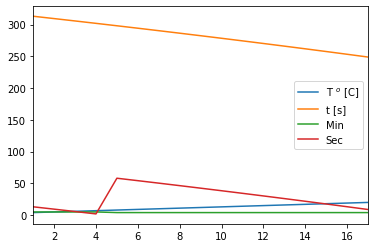

In [33]:
%matplotlib inline
df.plot()

In [34]:
df.to_csv('huevo.csv')

### Ejercicio 4.
Graficar $T$ vs $t$ para la lista que se calculó. Luego, calcular todas las listas de tiempo para cuando la masa del huevo cambia de $47$ a $67$ gramos.

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

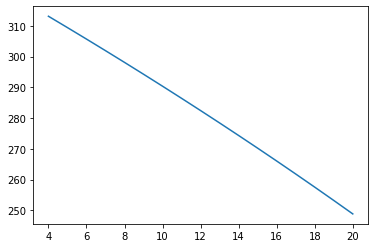

In [36]:
plt.plot(Tl, tl)

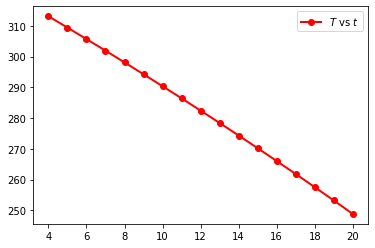

In [37]:
plt.plot(Tl, tl, 'o-', lw=2, c='red', label='$T$ vs $t$')
plt.legend()
plt.show()

Grafiquemos ahora para $M = 47, \dots, 67$ y $T = 4, \dots, 20$:

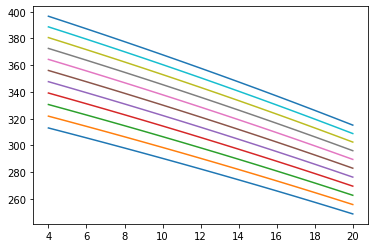

In [38]:
Ml = list(range(47,68,2))
for Mi in Ml:
    y = [huevoCocido(Mi, c, ρ, K, Ti) for Ti in Tl]
    plt.plot(Tl, y)

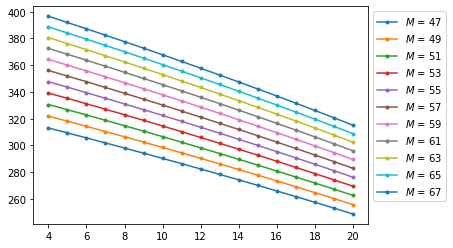

In [39]:
for Mi in Ml:
    plt.plot(Tl, 
             [huevoCocido(Mi, c, ρ, K, Ti) for Ti in Tl], 
             '.-',
             label='$M$ = {}'.format(Mi))

plt.legend(bbox_to_anchor=(1,1))
plt.show()

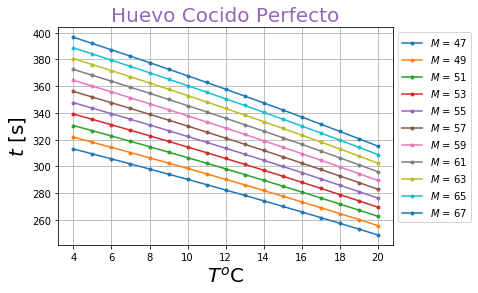

In [42]:
for Mi in Ml:
    plt.plot(Tl, 
             [huevoCocido(Mi, c, ρ, K, Ti) for Ti in Tl], 
             '.-',
             label='$M$ = {}'.format(Mi))

plt.title('Huevo Cocido Perfecto', fontsize=20, color='C4')
plt.xlabel('$T ^o$C', fontsize=20)
plt.ylabel('$t$ [s]', fontsize=20)
plt.grid()
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('huevoFigura.pdf')
plt.show()

### Ejercicio 6.
Realizar una gráfica 3D: $(T, M, t)$

In [43]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [44]:
Tg, Mg = np.meshgrid(Tl, Ml)
print(type(Tg), type(Mg))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [48]:
tg = huevoCocido(Mg, c, ρ, K, Tg)
print(type(tg))

<class 'numpy.ndarray'>


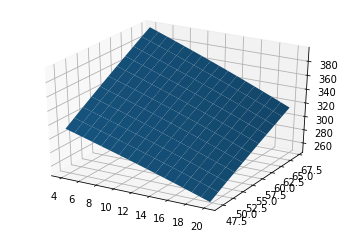

In [49]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Graficamos una superficie
surf = ax.plot_surface(Tg, Mg, tg)

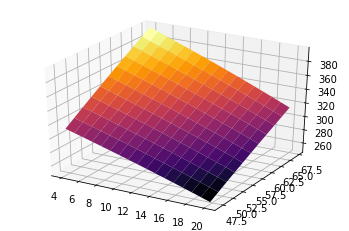

In [51]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Graficamos una superficie
surf = ax.plot_surface(Tg, Mg, tg, cmap='inferno')

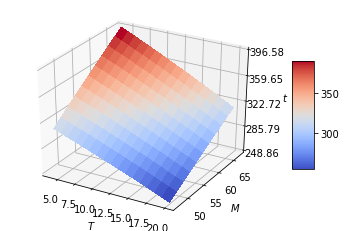

In [52]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

# Graficamos una superficie
surf = ax.plot_surface(Tg, Mg, tg, cmap='coolwarm', linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('$T$')
ax.set_ylabel('$M$')
ax.set_zlabel('$t$')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<IPython.core.display.Javascript object>


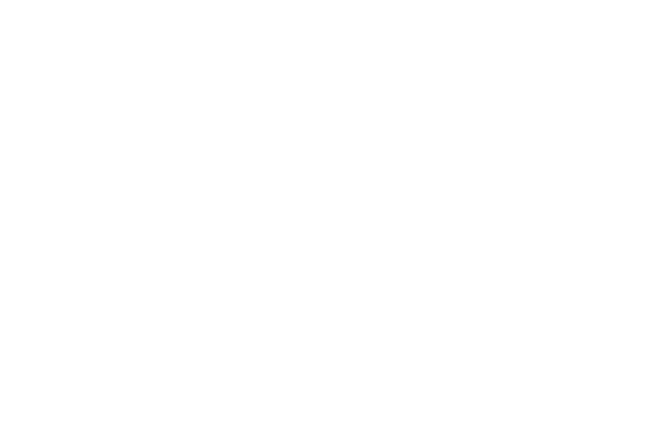

<IPython.core.display.Javascript object>


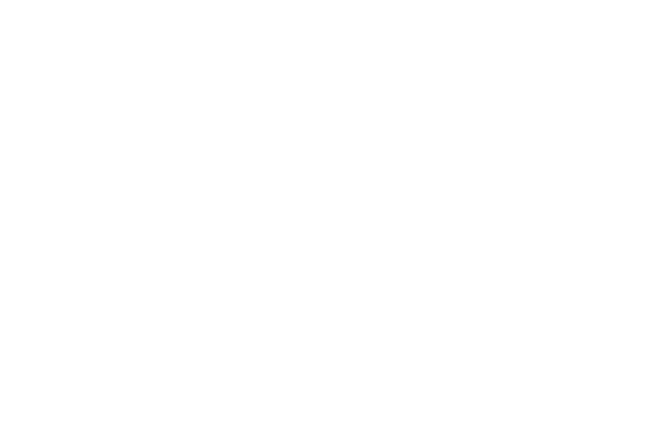

In [56]:

fig = plt.figure()
ax = fig.gca(projection='3d')

# Graficamos una superficie
surf = ax.plot_surface(Tg, Mg, tg, cmap='coolwarm', linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('$T$')
ax.set_ylabel('$M$')
ax.set_zlabel('$t$')
fig.colorbar(surf, shrink=0.5, aspect=5)
#plt.show()